# 📊 IPL 2025 – Exploratory Data Analysis

**Author:** Kowshik Naidu Valisetty  
**Tools:** Python, Pandas, Matplotlib, Seaborn  

---
## 1. Introduction
This project presents an exploratory data analysis (EDA) of the IPL 2025 season, focusing on player and team-level performance using batting and bowling statistics. The analysis was undertaken as a way to regain hands-on coding practice while applying structured analytical thinking to a real-world sports dataset.

The notebook explores both individual and team efficiency through carefully defined metrics and visualizations, aiming to derive meaningful insights rather than relying on raw aggregates or misleading averages.

---
## 2. Objective
The goal of this analysis is to explore team performance, player contributions, and match-level patterns in the IPL 2025 season using structured exploratory data analysis (EDA).

---
## 3. Questions Explored
This analysis was guided by the following key questions:

1. Who is the top-performing batsman in IPL 2025, and how does their performance compare to the season average?
2. Who is the top-performing bowler in IPL 2025, and how does their performance compare to the season average?
3. How do teams compare in terms of batting efficiency when strike rates are weighted by balls faced?
4. How do teams compare in terms of bowling efficiency when economy rates are weighted by overs bowled?
5. Is there a visible relationship between team-level batting efficiency and bowling efficiency?

---
## 4. Importing Required Libraries

These are the tools that'll be used for Exploratory Data Analysis

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

---
## 5. Datasets Loading

The datasets used in this analysis capture player-wise batting and bowling statistics from the IPL 2025 season.

In [95]:
batting_df = pd.read_csv("IPL2025Batters.csv")
bowling_df = pd.read_csv("IPL2025Bowlers.csv")

---
## 6. Dataset Dimensions

Understanding the size of the datasets helps assess the scope of the analysis.

In [96]:
batting_df.shape, bowling_df.shape

((156, 14), (108, 13))

**Observation:**  
Both datasets contain sufficient records and features to analyze player and team-level performance trends.

---
## 7. Dataset Preview

A preview of the datasets provides insight into the structure, columns, and data types.

In [97]:
batting_df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [98]:
bowling_df.head()

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
1,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0
2,Josh Hazlewood,RCB,22,12,12,44.0,386,33/4,17.54,8.77,12.00,1,0
3,Trent Boult,MI,22,16,16,57.4,517,26/4,23.50,8.96,15.72,1,0
4,Arshdeep Singh,PBKS,21,17,16,58.2,518,16/3,24.66,8.88,16.66,0,0


---
## 8. Data Quality & Sanity Checks

Before analysis, we verify missing values, data types, and column consistency
to ensure reliable results.

> ###  Missing Values Check

In [99]:
batting_df.isnull().sum()

Player Name    0
Team           0
Runs           0
Matches        0
Inn            0
No             0
HS             0
AVG            0
BF             0
SR             0
100s           0
50s            0
4s             0
6s             0
dtype: int64

In [100]:
bowling_df.isnull().sum()

Player Name    0
Team           0
WKT            0
MAT            0
INN            0
OVR            0
RUNS           0
BBI            0
AVG            0
ECO            0
SR             0
4W             0
5W             0
dtype: int64

> ###  Data Type Sanity Check

In [101]:
batting_df.dtypes

Player Name     object
Team            object
Runs             int64
Matches          int64
Inn              int64
No               int64
HS              object
AVG             object
BF               int64
SR             float64
100s             int64
50s              int64
4s               int64
6s               int64
dtype: object

In [102]:
bowling_df.dtypes

Player Name     object
Team            object
WKT              int64
MAT              int64
INN              int64
OVR            float64
RUNS             int64
BBI             object
AVG            float64
ECO            float64
SR             float64
4W               int64
5W               int64
dtype: object

**Observation:**  
No critical missing values are present. Data types require minor standardization.

---
## 9. Column Standardization

Column names are standardized to lowercase snake_case for consistency
and ease of access.

In [103]:
batting_df.columns = batting_df.columns.str.lower().str.replace(" ", "_")
bowling_df.columns = bowling_df.columns.str.lower().str.replace(" ", "_")

In [104]:
batting_df.columns

Index(['player_name', 'team', 'runs', 'matches', 'inn', 'no', 'hs', 'avg',
       'bf', 'sr', '100s', '50s', '4s', '6s'],
      dtype='object')

In [105]:
bowling_df.columns

Index(['player_name', 'team', 'wkt', 'mat', 'inn', 'ovr', 'runs', 'bbi', 'avg',
       'eco', 'sr', '4w', '5w'],
      dtype='object')

---
## 10. Data Type Correction & Cleanup

The batting average column is converted to numeric format.  
Redundant columns are removed where applicable.

In [106]:
batting_df["avg"] = pd.to_numeric(batting_df["avg"], errors="coerce")

In [107]:
if "no" in batting_df.columns:
    batting_df = batting_df.drop(columns="no")

In [108]:
batting_df.dtypes

player_name     object
team            object
runs             int64
matches          int64
inn              int64
hs              object
avg            float64
bf               int64
sr             float64
100s             int64
50s              int64
4s               int64
6s               int64
dtype: object

---
## 11. Top Batsman vs Season Average

This section compares the top run-scorer with the season average
(using qualified batsmen only).

In [109]:
top_batsman = batting_df.loc[batting_df["runs"].idxmax()]
top_batsman

player_name    Sai Sudharsan
team                      GT
runs                     759
matches                   15
inn                       15
hs                      108*
avg                    54.21
bf                       486
sr                    156.17
100s                       1
50s                        6
4s                        88
6s                        21
Name: 0, dtype: object

In [110]:
qualified_batsmen = batting_df[batting_df["bf"] > 50]

season_avg = {
    "runs": round(qualified_batsmen["runs"].mean(), 2),
    "avg": round(qualified_batsmen["avg"].mean(), 2),
    "sr": round(qualified_batsmen["sr"].mean(), 2),
}

comparison_bat = pd.DataFrame(
    {
        "Top Batsman": [top_batsman["runs"], top_batsman["avg"], top_batsman["sr"]],
        "Season Average": list(season_avg.values()),
    },
    index=["Runs", "Batting Average", "Strike Rate"],
)

comparison_bat

,Top Batsman,Season Average
Runs,759.00,275.64
Batting Average,54.21,31.17
Strike Rate,156.17,152.29


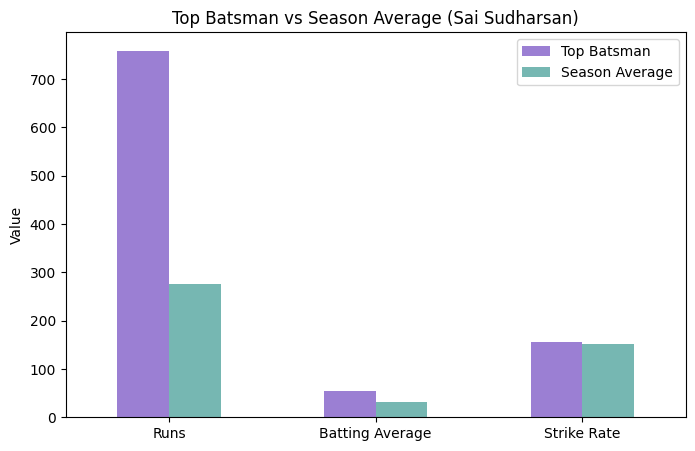

In [133]:
comparison_bat.plot(kind="bar", figsize=(8,5), color=['#9B7FD3', '#76B7B2'])
plt.title(f"Top Batsman vs Season Average ({top_batsman['player_name']})")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()

**Insight:**  
Elite batting performance significantly exceeds season averages,
highlighting the impact of standout players.

---
## 12. Top Bowler vs Season Average

Bowling performance comparison using qualified bowlers only.

In [112]:
qualified_bowlers = bowling_df[bowling_df["ovr"] > 25]
top_bowler = qualified_bowlers.loc[qualified_bowlers["wkt"].idxmax()]
top_bowler

player_name    Prasidh Krishna
team                        GT
wkt                         25
mat                         15
inn                         15
ovr                       59.0
runs                       488
bbi                       41/4
avg                      19.52
eco                       8.27
sr                       14.16
4w                           1
5w                           0
Name: 0, dtype: object

In [113]:
comparison_bowl = pd.DataFrame(
    {
        "Top Bowler": [
            top_bowler["wkt"],
            top_bowler["avg"],
            top_bowler["eco"],
        ],
        "Season Average": [
            qualified_bowlers["wkt"].mean(),
            qualified_bowlers["avg"].mean(),
            qualified_bowlers["eco"].mean(),
        ],
    },
    index=["Wickets", "Average", "Economy"],
)

comparison_bowl

,Top Bowler,Season Average
Wickets,25.00,13.608696
Average,19.52,32.220652
Economy,8.27,9.254130


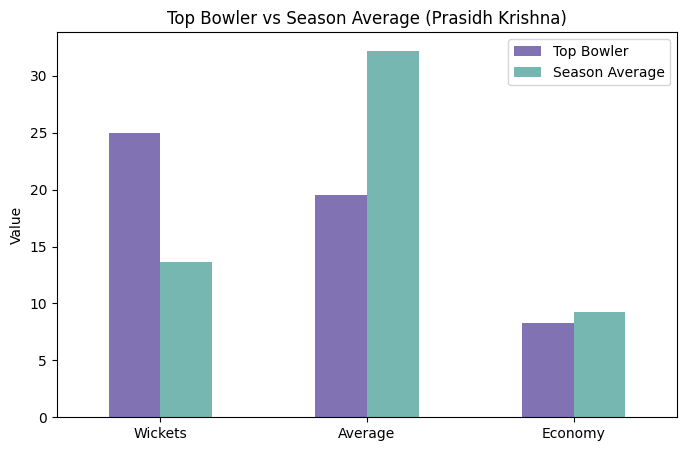

In [126]:
comparison_bowl.plot(kind="bar", figsize=(8,5), color=['#8172B3', '#76B7B2'])
plt.title(f"Top Bowler vs Season Average ({top_bowler['player_name']})")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()

**Insight:**  
Top bowlers outperform season averages across all key metrics,
reinforcing their match-winning influence.

---
## 13. Team-wise Weighted Batting Efficiency

Strike rates are weighted by balls faced to reflect true team scoring efficiency.

In [115]:
qualified_batsmen = batting_df[batting_df["bf"] >= 100][["team", "runs", "bf"]]

team_bat = qualified_batsmen.groupby("team").sum()
team_weighted_sr = ((team_bat["runs"] / team_bat["bf"]) * 100).sort_values()
team_weighted_sr

team
CSK     143.993086
KKR     148.701299
DC      150.224551
MI      155.213984
LSG     157.200268
RCB     157.425743
GT      159.222661
RR      160.196906
PBKS    163.653367
SRH     163.665087
dtype: float64

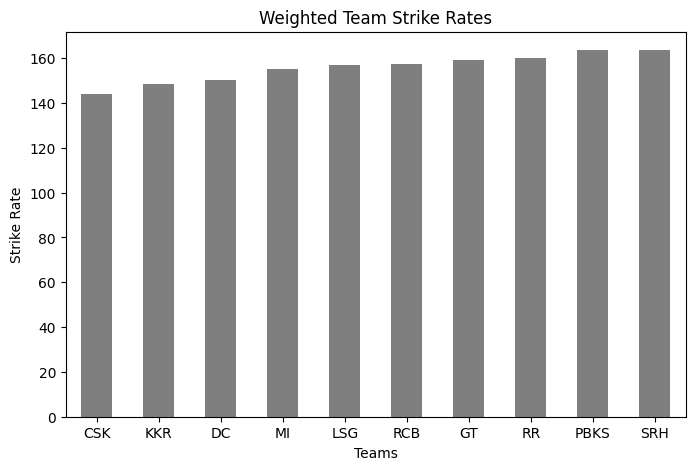

In [136]:
team_weighted_sr.plot(kind="bar", figsize=(8,5), color='#7F7F7F')
plt.title("Weighted Team Strike Rates")
plt.xlabel("Teams")
plt.ylabel("Strike Rate")
plt.xticks(rotation=0)
plt.show()

**Insight:**  
Teams with higher strike rates tend to maintain aggressive scoring throughout the tournament.

---
## 14. Team-wise Weighted Bowling Efficiency

Economy rates are weighted by overs bowled for fair comparison.

In [117]:
qualified_bowlers = bowling_df[bowling_df["ovr"] >= 17][["team", "ovr", "runs"]]

team_bowl = qualified_bowlers.groupby("team").sum()
team_weighted_eco = (team_bowl["runs"] / team_bowl["ovr"]).sort_values(ascending=False)
team_weighted_eco

team
LSG     10.136986
RR       9.616805
SRH      9.515269
PBKS     9.394360
GT       9.283168
KKR      9.172518
DC       9.077129
CSK      9.038208
RCB      8.962656
MI       8.726062
dtype: float64

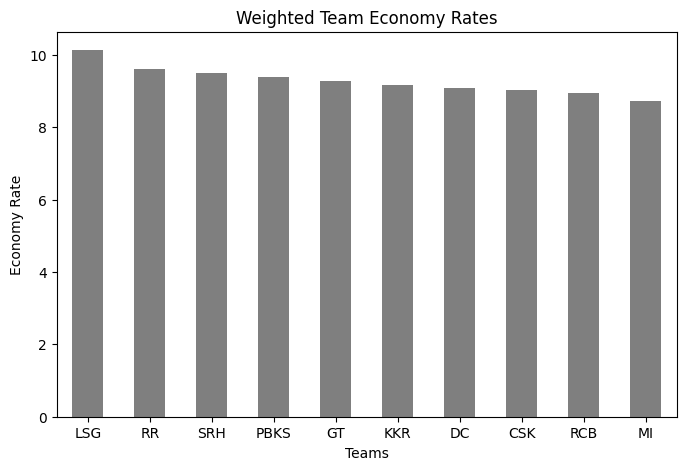

In [137]:
team_weighted_eco.plot(kind="bar", figsize=(8,5), color='#7F7F7F')
plt.title("Weighted Team Economy Rates")
plt.xlabel("Teams")
plt.ylabel("Economy Rate")
plt.xticks(rotation=0)
plt.show()

**Insight:**  
Lower economy rates indicate disciplined bowling units capable of controlling matches.

---
## 15. Batting vs Bowling Efficiency (Team Level)

This scatter plot compares team-level batting and bowling efficiency.

In [119]:
team_efficiency = pd.DataFrame(
    {
        "Batting Efficiency": team_weighted_sr,
        "Bowling Efficiency": team_weighted_eco,
    }
).reset_index()
team_efficiency

,team,Batting Efficiency,Bowling Efficiency
0,CSK,143.993086,9.038208
1,DC,150.224551,9.077129
2,GT,159.222661,9.283168
3,KKR,148.701299,9.172518
4,LSG,157.200268,10.136986
5,MI,155.213984,8.726062
6,PBKS,163.653367,9.394360
7,RCB,157.425743,8.962656
8,RR,160.196906,9.616805
9,SRH,163.665087,9.515269


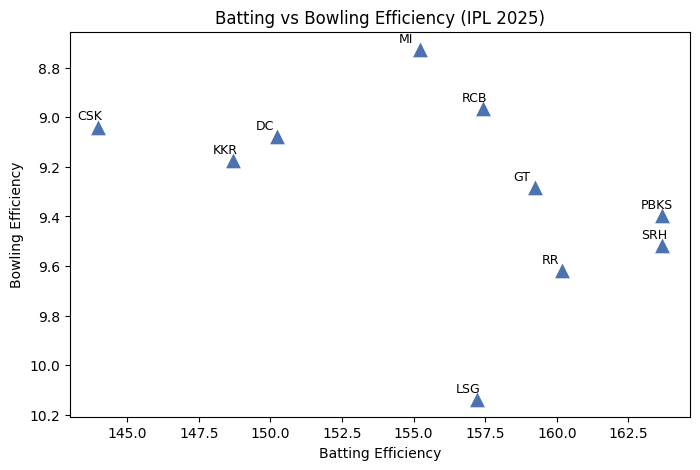

In [138]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    data=team_efficiency,
    x="Batting Efficiency",
    y="Bowling Efficiency",
    s=150,
    marker="^",
    color='#4C72B0'
)

ax.invert_yaxis()

for _, row in team_efficiency.iterrows():
    ax.annotate(
        row["team"],
        (row["Batting Efficiency"], row["Bowling Efficiency"]),
        xytext=(-15, 5),
        textcoords="offset points",
        fontsize=9,
    )

plt.title("Batting vs Bowling Efficiency (IPL 2025)")
plt.xlabel("Batting Efficiency")
plt.ylabel("Bowling Efficiency")
plt.show()

**Insight:**  
Teams display varying strategic balances—some excel in batting,
others in bowling, while few manage strength in both.

---
## 🔚 Conclusion

### Key Findings

- The datasets required minimal cleaning, with only minor data type corrections and column standardization.
- A small number of elite batsmen and bowlers significantly outperform season averages, highlighting the impact of individual excellence.
- Weighted team strike rates reveal meaningful differences in batting efficiency that are not visible through simple averages.
- Weighted economy rates provide a more accurate measure of bowling efficiency by accounting for workload.
- Team-level analysis shows varying strategic strengths, with some teams excelling in batting, others in bowling, and a few maintaining balance in both.

### Overall Insight

IPL 2025 performance is strongly influenced by standout individual players and team-specific strategic strengths.  
Using workload-weighted metrics provides a more realistic evaluation of team efficiency than raw averages.

### Future Scope

- Player impact and consistency modeling  
- Match outcome prediction using team efficiency metrics  
- Feature engineering for machine learning-based performance analysis
